In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv("../data/stroke.csv")

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df = df.drop(columns = ['id'])

In [8]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [9]:
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [13]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: stroke
0    3889
1     199
Name: count, dtype: int64
After SMOTE: stroke
0    3889
1    3889
Name: count, dtype: int64


In [14]:
rf_stroke = RandomForestClassifier(random_state=42)
rf_stroke.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [15]:
y_pred_rf = rf_stroke.predict(X_test)

In [16]:
print("Random Forest Stroke Prediction (SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Stroke Prediction (SMOTE):
Accuracy: 0.9031311154598826
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.14      0.20      0.17        50

    accuracy                           0.90      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.92      0.90      0.91      1022



In [19]:
importances = rf_stroke.feature_importances_

In [29]:
feature_names = X.columns 

In [30]:
feature_names

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [31]:
lr_stroke = LogisticRegression(max_iter = 1000)
lr_stroke.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [39]:
y_pred_lr = lr_stroke.predict(X_test)

In [41]:
print("Logistic Regression Stroke Prediction (SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Stroke Prediction (SMOTE):
Accuracy: 0.7847358121330724
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       972
           1       0.15      0.72      0.25        50

    accuracy                           0.78      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.94      0.78      0.84      1022



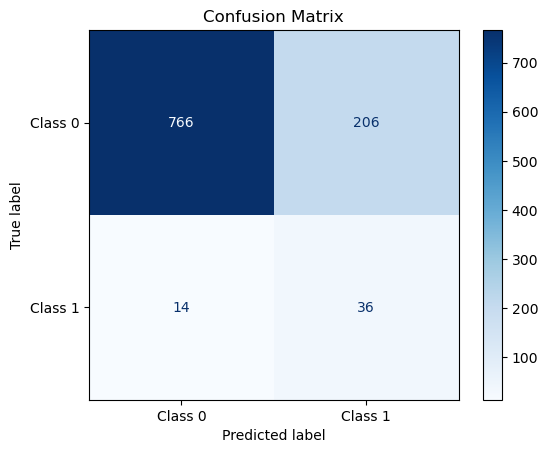

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test = true labels
# y_pred = predicted labels (from your model)

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
